## 程式說明  Portfolio Optimization with Python using Efficient Frontier with Practical Examples
  https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/ 


## 範例程式 https://ithelp.ithome.com.tw/articles/10249694


In [1]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Data
test = data.DataReader(['0050.TW','00679B.TWO'], 'yahoo', start='2017/01/11', end='2021/12/31')
test.head()

Attributes  Adj Close                 Close                  High             \
Symbols       0050.TW 00679B.TWO    0050.TW 00679B.TWO    0050.TW 00679B.TWO   
Date                                                                           
2017-01-11  72.400002  39.998798  72.400002  39.998798  72.849998  39.998798   
2017-01-12  73.150002  39.790501  73.150002  39.790501  73.300003  39.790501   
2017-01-13  72.599998  39.560101  72.599998  39.560101  72.800003  39.560101   
2017-01-16  72.000000        NaN  72.000000        NaN  72.400002        NaN   
2017-01-17  72.300003  39.689999  72.300003  39.689999  72.400002  39.779999   

Attributes        Low                  Open                Volume             
Symbols       0050.TW 00679B.TWO    0050.TW 00679B.TWO    0050.TW 00679B.TWO  
Date                                                                          
2017-01-11  72.400002  39.998798  72.800003  39.998798  1898053.0        0.0  
2017-01-12  72.599998  39.790501  72.599998  39.790501  4857459.0        0.0  
2017-01-13  72.599998  39.560101  72.800003  39.560101  3909860.0        0.0  
2017-01-16  71.800003        NaN  72.400002        NaN  2418439.0        NaN  
2017-01-17  72.000000  39.509998  72.000000  39.700001  1572741.0   928000.0

In [3]:
# Closing price
test = test['Adj Close']
test.head()

Symbols,0050.TW,00679B.TWO
Date,,
2017-01-11,72.400002,39.998798
2017-01-12,73.150002,39.790501
2017-01-13,72.599998,39.560101
2017-01-16,72.000000,NaN
2017-01-17,72.300003,39.689999


In [4]:
# Log of percentage change
etf_0050 = test['0050.TW'].pct_change().apply(lambda x: np.log(1+x))
etf_0050.head()

Date
2017-01-11         NaN
2017-01-12    0.010306
2017-01-13   -0.007547
2017-01-16   -0.008299
2017-01-17    0.004158
Name: 0050.TW, dtype: float64

In [5]:
# Variance
var_etf_0050 = etf_0050.var()
var_etf_0050

0.00011387110674204043

In [7]:
# Log of Percentage change for Facebook
etf_00679B = test['00679B.TWO'].pct_change().apply(lambda x: np.log(1+x))
etf_00679B.head()

Date
2017-01-11         NaN
2017-01-12   -0.005221
2017-01-13   -0.005807
2017-01-16    0.000000
2017-01-17    0.003278
Name: 00679B.TWO, dtype: float64

In [8]:
# Variance
var_etf_00679B = etf_00679B.var()
var_etf_00679B

7.289805817802401e-05

In [9]:
# Volatility
etf_0050_vol = np.sqrt(var_etf_0050 * 250)
etf_00679B_vol = np.sqrt(var_etf_00679B * 250)
etf_0050_vol, etf_00679B_vol

(0.1687239659488542, 0.13499820200471563)

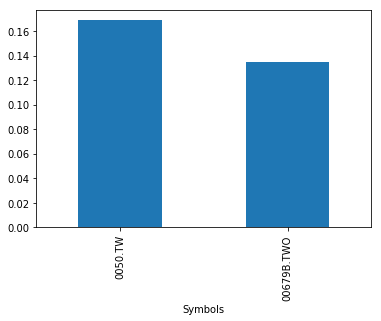

In [10]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

In [11]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Symbols,0050.TW,00679B.TWO
Date,,
2017-01-11,NaN,NaN
2017-01-12,0.010306,-0.005221
2017-01-13,-0.007547,-0.005807
2017-01-16,-0.008299,0.000000
2017-01-17,0.004158,0.003278


In [12]:
# Covariance
test1['0050.TW'].cov(test1['00679B.TWO'])

-1.906106401383426e-05

In [13]:
# Correlation
test1['0050.TW'].corr(test1['00679B.TWO'])

-0.20920997571046213

In [14]:
# Expected Returns
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Symbols,0050.TW,00679B.TWO
Date,,
2017-01-11,NaN,NaN
2017-01-12,0.010306,-0.005221
2017-01-13,-0.007547,-0.005807
2017-01-16,-0.008299,0.000000
2017-01-17,0.004158,0.003278


In [15]:
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

Symbols
0050.TW       0.000576
00679B.TWO    0.000025
dtype: float64

In [16]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r

0.00013502748098413522

## 實戰

In [2]:
# Import data
df = data.DataReader(['0050.TW','0051.TW','TLT'], 'yahoo', start='2006/09/01', end='2021/12/31')
df.head()

Attributes Adj Close                      Close                       High  \
Symbols      0050.TW 0051.TW        TLT 0050.TW 0051.TW        TLT 0050.TW   
Date                                                                         
2006-08-31       NaN     NaN  55.351604     NaN     NaN  88.080002     NaN   
2006-09-01       NaN     NaN  55.370541     NaN     NaN  87.760002     NaN   
2006-09-05       NaN     NaN  55.023537     NaN     NaN  87.209999     NaN   
2006-09-06       NaN     NaN  54.947819     NaN     NaN  87.089996     NaN   
2006-09-07       NaN     NaN  55.055103     NaN     NaN  87.260002     NaN   

Attributes                        Low                       Open          \
Symbols    0051.TW        TLT 0050.TW 0051.TW        TLT 0050.TW 0051.TW   
Date                                                                       
2006-08-31     NaN  88.199997     NaN     NaN  87.739998     NaN     NaN   
2006-09-01     NaN  87.900002     NaN     NaN  87.470001     NaN     NaN   
2006-09-05     NaN  87.639999     NaN     NaN  87.160004     NaN     NaN   
2006-09-06     NaN  87.089996     NaN     NaN  86.720001     NaN     NaN   
2006-09-07     NaN  87.320000     NaN     NaN  86.739998     NaN     NaN   

Attributes             Volume                     
Symbols           TLT 0050.TW 0051.TW        TLT  
Date                                              
2006-08-31  87.739998     NaN     NaN  1272400.0  
2006-09-01  87.620003     NaN     NaN   893400.0  
2006-09-05  87.510002     NaN     NaN  2271300.0  
2006-09-06  86.889999     NaN     NaN  1853400.0  
2006-09-07  86.930000     NaN     NaN  1716100.0

In [3]:
# Closing price
df = df['Adj Close']
df.head()

Symbols,0050.TW,0051.TW,TLT
Date,,,
2006-08-31,NaN,NaN,55.351604
2006-09-01,NaN,NaN,55.370541
2006-09-05,NaN,NaN,55.023537
2006-09-06,NaN,NaN,54.947819
2006-09-07,NaN,NaN,55.055103


In [4]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,0050.TW,0051.TW,TLT
Symbols,,,
0050.TW,0.000189,0.000117,-0.000009
0051.TW,0.000117,0.000185,-0.000009
TLT,-0.000009,-0.000009,0.000083


In [5]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,0050.TW,0051.TW,TLT
Symbols,,,
0050.TW,1.000000,0.625776,-0.070274
0051.TW,0.625776,1.000000,-0.070319
TLT,-0.070274,-0.070319,1.000000


In [22]:
# Randomly weighted portfolio's variance
w = {'0050.TW': 0.1, '0051.TW': 0.1,'TLT': 0.8}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

5.623804516020746e-05

In [6]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
0050.TW    0.138729
0051.TW    0.138310
TLT        0.077612
dtype: float64

In [7]:
# Portfolio returns
w = [0.2, 0.2,0.6]
port_er = (w*ind_er).sum()
port_er

0.10197511295324016

In [8]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
0050.TW    0.217204
0051.TW    0.214932
TLT        0.143939
dtype: float64

In [9]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
0050.TW,0.138729,0.217204
0051.TW,0.138310,0.214932
TLT,0.077612,0.143939


In [10]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [11]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [12]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [13]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,0050.TW weight,0051.TW weight,TLT weight
0,0.119930,0.141685,0.193236,0.502610,0.304153
1,0.124848,0.156746,0.587457,0.186696,0.225847
2,0.113665,0.134517,0.027800,0.565980,0.406220
3,0.121775,0.147152,0.528307,0.195624,0.276069
4,0.125237,0.160806,0.122129,0.661643,0.216228


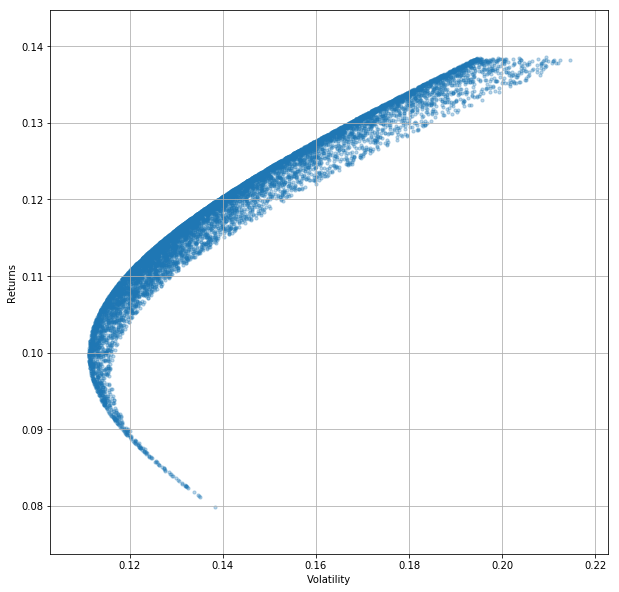

In [14]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [15]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns           0.099599
Volatility        0.111217
0050.TW weight    0.174640
0051.TW weight    0.186386
TLT weight        0.638974
Name: 8656, dtype: float64

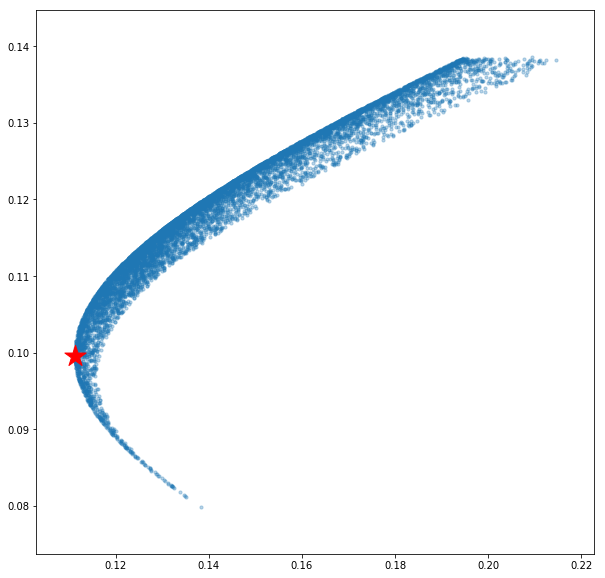

In [16]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [17]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns           0.107616
Volatility        0.115846
0050.TW weight    0.241607
0051.TW weight    0.251042
TLT weight        0.507351
Name: 1598, dtype: float64

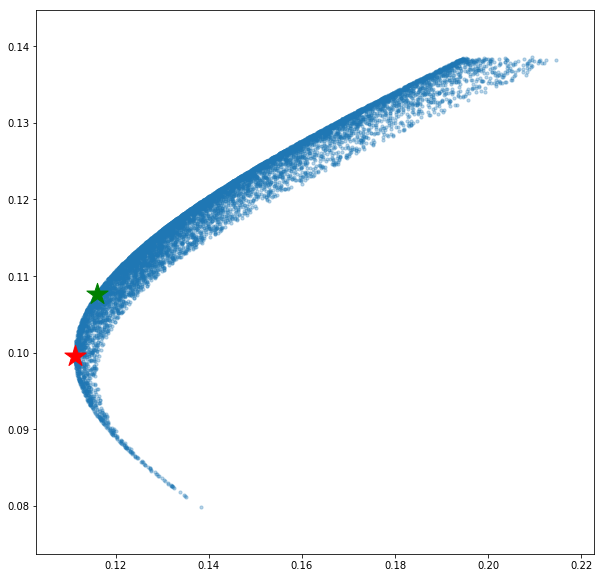

In [18]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

## 資產配置組合
### Returns              0.127017
### Volatility           0.123903
### 0050.TW weight       0.749655
### 00679B.TWO weight    0.250345

In [19]:
portfolios[portfolios['0050.TW weight']>0.8]

,Returns,Volatility,0050.TW weight,0051.TW weight,TLT weight
21,0.134483,0.192315,0.801719,0.129686,0.068595
47,0.138452,0.203676,0.814268,0.182452,0.003280
110,0.133216,0.192699,0.853222,0.056961,0.089817
134,0.135588,0.196424,0.821798,0.127685,0.050517
175,0.131638,0.189988,0.864929,0.019173,0.115898
659,0.137677,0.208290,0.918010,0.065219,0.016770
756,0.129219,0.181903,0.828859,0.015642,0.155498
790,0.138172,0.214594,0.984275,0.006645,0.009080
809,0.137982,0.205842,0.871238,0.117335,0.011426
909,0.138104,0.210978,0.939978,0.050137,0.009885


In [20]:
portfolios[(portfolios['0050.TW weight'] >0.2) & (portfolios['0050.TW weight'] <0.201)]

,Returns,Volatility,0050.TW weight,0051.TW weight,TLT weight
1319,0.125118,0.156537,0.200788,0.580478,0.218735
1587,0.134115,0.186543,0.200425,0.729079,0.070496
3249,0.116265,0.132075,0.200710,0.434708,0.364581
3608,0.113462,0.125856,0.200939,0.388301,0.410761
4156,0.125125,0.156577,0.200401,0.580994,0.218604
4505,0.114825,0.128773,0.200687,0.411007,0.388306
5446,0.114866,0.128868,0.200547,0.411823,0.387630
5504,0.119579,0.140471,0.200656,0.489363,0.309982
5717,0.104206,0.112747,0.200041,0.236714,0.563246
5754,0.113309,0.125556,0.200391,0.386328,0.413281


In [21]:
portfolios['0050.TW weight'] <0.55

0        True
1       False
2        True
3        True
4        True
5       False
6        True
7        True
8        True
9        True
10      False
11       True
12       True
13       True
14       True
15      False
16       True
17       True
18       True
19       True
20       True
21      False
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
9970     True
9971     True
9972     True
9973     True
9974     True
9975     True
9976     True
9977     True
9978     True
9979     True
9980     True
9981     True
9982     True
9983    False
9984     True
9985     True
9986     True
9987     True
9988     True
9989     True
9990    False
9991     True
9992     True
9993     True
9994     True
9995     True
9996     True
9997     True
9998    False
9999     True
Name: 0050.TW weight, Length: 10000, dtype: bool